## Heart Failure Prediction Data Analysis
**Group 22:** Ahmed Ahmed, Anita Odchimar, Asma Al-Qasimi, Clyde Correa, Ling Zhuang

Data Obtained from Kaggle at:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

* **Import the necessary packages.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import ols
from statsmodels.discrete.discrete_model import Logit

from scipy.special import logit

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import itertools
import warnings
warnings.filterwarnings('ignore')

* **Data Exploration and Visualization**

In [ ]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [ ]:
print(df.columns.to_list())

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


#### Dataset Description

* age - age 
* anaemia - Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
* diabetes - If the patient has diabetes (boolean)
* ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure - If the patient has hypertension (boolean)
* platelets - Platelets in the blood (kiloplatelets/mL)
* serum_creatinine - Level of serum creatinine in the blood (mg/dL)
* serum_sodium - Level of serum sodium in the blood (mEq/L)
* sex - Woman or man (binary) | Male = 1, Female = 0
* smoking - If the patient smokes or not (boolean)
* time - Follow-up period (days)
* DEATH_EVENT - If the patient deceased during the follow-up period (boolean)

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


No null values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Histogram, showing the distribution of the values for each attribute:

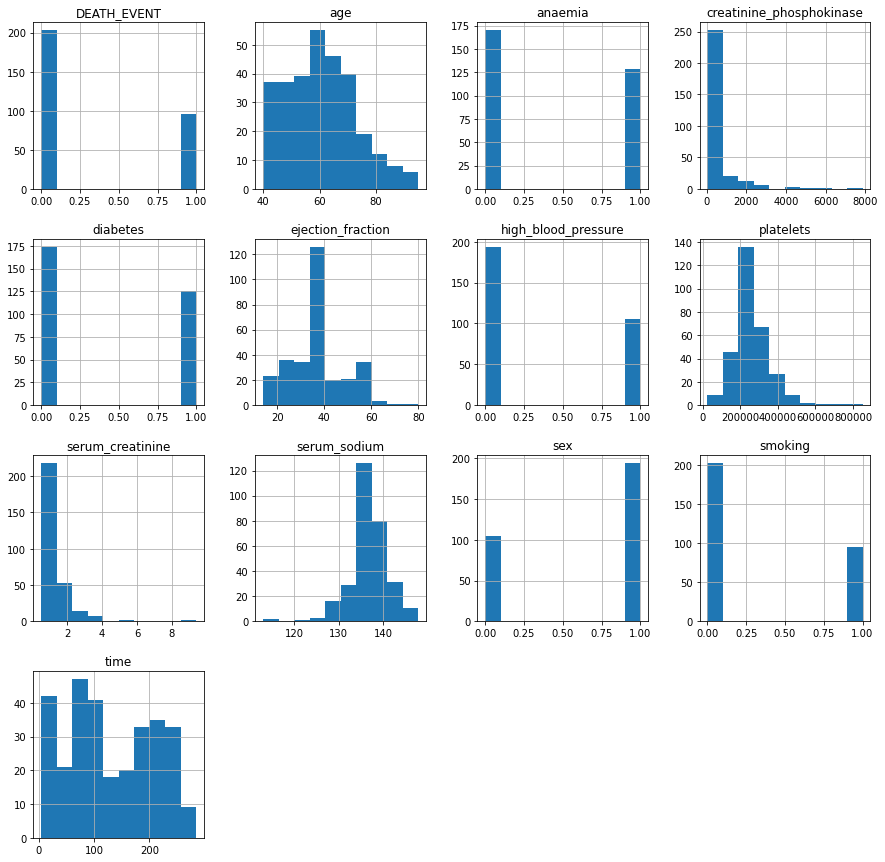

In [ ]:
df.hist(figsize=(15,15))
plt.show()

Roughly, the distribution type of the attributes:

In [ ]:
distribution = ['Normal', 'Bernoulli', "Skewed", "Bernoulli", "Normal", "Bernoulli", "Normal", "Skewed", "Normal", "Bernoulli",\
 "Bernoulli", "Uniform","Bernoulli"]
pd.DataFrame(distribution, index=df.columns, columns=['Distribution Type'])

,Distribution Type
age,Normal
anaemia,Bernoulli
creatinine_phosphokinase,Skewed
diabetes,Bernoulli
ejection_fraction,Normal
high_blood_pressure,Bernoulli
platelets,Normal
serum_creatinine,Skewed
serum_sodium,Normal
sex,Bernoulli


Select statistical properties of the attributes:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


* Death rate is 32%
* The average of age is 60, the youngest is 40, and the oldest is 95
* 43.1% have anaemia
* 41.8% have diabetes
* 35.1% have high blood pressure 
* 32.1% smoke
* The average of follow-up days is 130.3

Check for correlation and collinearity.

From the following scatter plots, we can see that there is no obvious correlation or collinearity between the attributes.

In [ ]:
#sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time','DEATH_EVENT']], hue="DEATH_EVENT")

In the following bar graphs, notice that the occurence of death is consistently lower than non-occurence for all binary variables. As we split each binarry attribute into two attibutes (classified either 0 and 1), the two resulting attributes are then correlated to each other as if var1=0 then var2=1, vice versa. Thus, we avoid to include the two variable that were split from the binary variable simultaneously in our regression.

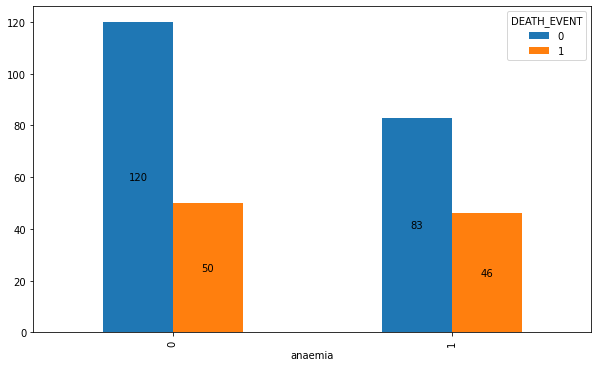

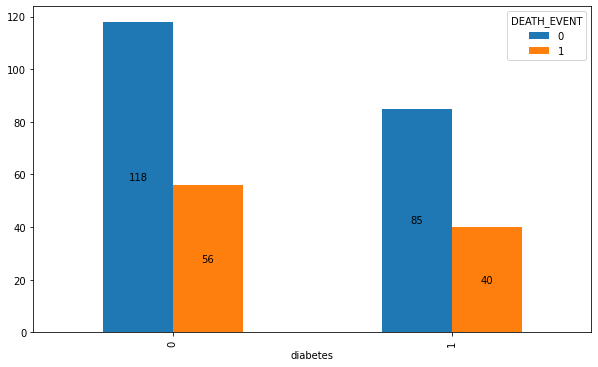

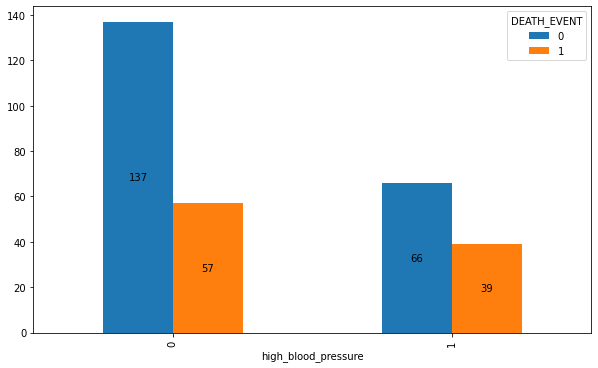

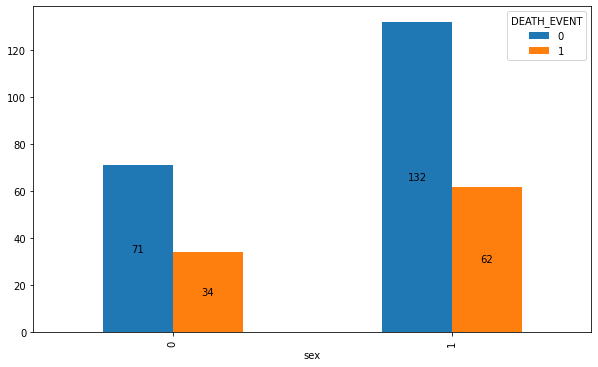

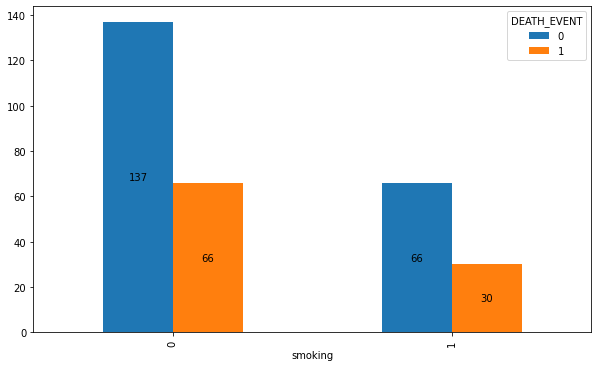

In [ ]:
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for i in binary_vars:
    data = df.groupby([i, 'DEATH_EVENT'])['DEATH_EVENT'].count().unstack('DEATH_EVENT')
    ax = data.plot(kind='bar', figsize=(10,6))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, y+height/2, '{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

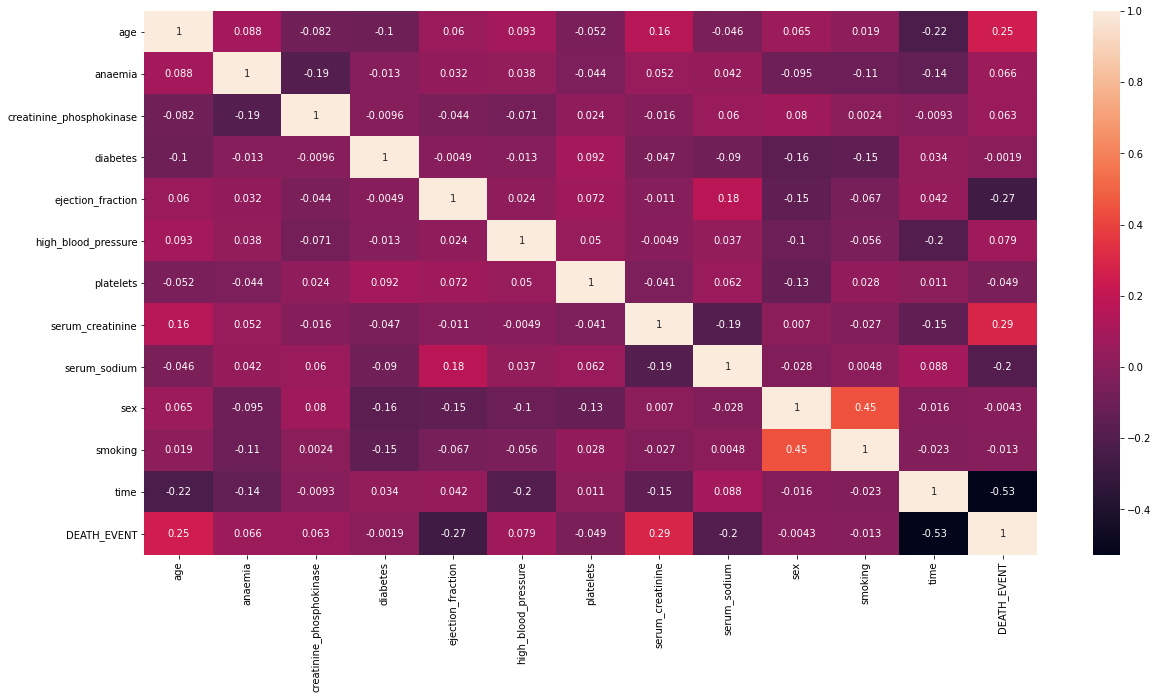

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr('pearson'), annot=True) #finds measure a linearity between features

The graph above also shows that there is **no collinearity** between numeric variables. This is important, as it shows that the independent variables are not correlated with each other, making a **Logistic Regression Model appropriate** for the analysis.

**Note** that at the end of this file, you will find an **Appendix**, where for demonstration purposes, we perform an analysis assuming that a Linear Regression Model is appropriate, and, as expected, show that it is not (low R^2 value obtained).

We can look at the correlation of Death Occurance with the other attributes in the following table (starting from the most correlated attribute):

In [ ]:
cor = df.corr()
cor_relevance = pd.DataFrame({'cor':abs(cor["DEATH_EVENT"])})
cor_relevance.sort_values(by=['cor'], inplace=True, ascending=False)
cor_relevance

,cor
DEATH_EVENT,1.000000
time,0.526964
serum_creatinine,0.294278
ejection_fraction,0.268603
age,0.253729
serum_sodium,0.195204
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
platelets,0.049139


* **Data Analysis**

### Logistic Regression Model

Logistic regression is selected because the dependent variable, Death Occurence, is a binary quantity.

To get an idea of **which attributes are the most important predictors** of death occurence, we first run a quick Logit model taking all the attributes as predictors. We then trim the predictors using different approaches and compare the logit models through **model statistical significance of predictors, statistical accuracy and other evaluation criteria**.

 The following approaches to improve the model were used:
 * First approach: **removal of non-significant attributes** based on p-value
 * Second approach: trying out difference **combinations of predictors** (derived from using only one of the sub-categories of the categorical variables)
 * Third approach: **backward elimination of predictors** by minimizing Akaike information criterion (AIC) 

Machine learning algorithm for logistic regression is also used (from scikit-learn). 




.

* **Logit Model with all Attributes** 
(original model)

In [ ]:
#function to perform logistic regression given dataframe, list of predictors 'a', and assigned name to model
def logitfit(dataframe, a):
    global m
    m = Logit(dataframe['DEATH_EVENT'], dataframe[a])
    m = m.fit(disp=0)
    
predictors = ['anaemia','age','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
              'serum_sodium','sex','smoking','time']
logitfit(df,predictors)

In [ ]:
print(m.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.406     
Dependent Variable:    DEATH_EVENT        AIC:                246.8505  
Date:                  2020-12-12 14:08   BIC:                291.2558  
No. Observations:      299                Log-Likelihood:     -111.43   
Df Model:              11                 LL-Null:            -187.67   
Df Residuals:          287                LLR p-value:        4.5991e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
anaemia                  -0.0374   0.3568 -0.1049 0.9164 -0.7369  0.6620
age                       0.0523   0.0155  3.3869 0.0007  0.0221  0.0826
creatin

Therefore, we conclude that for univariate analysis, **age**, **ejection_fraction**, **serum_creatinine**, and **time** have statistical significance.

In [ ]:
df.loc[:,'p'] = m.predict(df[predictors])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,p
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.968605
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0.887356
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0.923388
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.889098
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0.980719


In [ ]:
df.loc[:, 'y_p'] = (df.p > 0.5) * 1
df.y_p.value_counts()

0    214
1     85
Name: y_p, dtype: int64

In [ ]:
pd.crosstab(df.DEATH_EVENT, df.y_p)

y_p,0,1
DEATH_EVENT,,
0,185,18
1,29,67


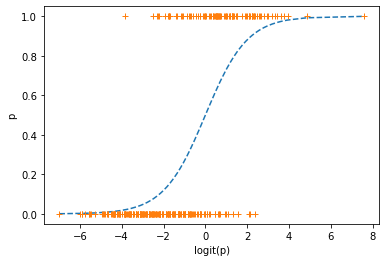

In [ ]:
df.loc[:,'p'] = m.predict(df[predictors])
df = df.sort_values(by = ['p'], axis = 0)
plt.plot(logit(df.p), df.p, '--')
plt.plot(logit(df.p), df.DEATH_EVENT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

Area under ROC curve = 0.89504


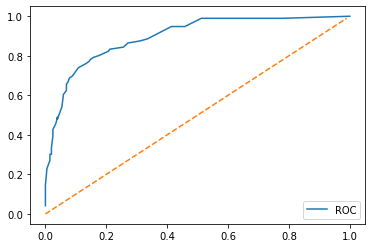

In [ ]:
#function to get roc area of for logit model derived from 'dataframe' and 'Predictors'
def roc_auc(dataframe, Predictors):
    global auc, roc
    logitfit(dataframe, Predictors)
    ths = np.arange(0., 1.0, 0.025)
    sensitivity = []
    specificity = []
    accuracy = []
    matthews = []

    for th in ths:
        conf_mat = m.pred_table(threshold=th)
        tn, fp, fn, tp = conf_mat.flatten()
        sens = (1. * tp) / (tp + fn)
        spec = (1. * tn) / (tn + fp)    
        acc = (tp + tn) / np.sum(conf_mat)
        mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    
        sensitivity.append(sens)
        specificity.append(spec)
        accuracy.append(acc)
        matthews.append(mcc)
    roc = pd.DataFrame({'discret_thr' : ths,'sensitivity' : sensitivity, 'specificity' : specificity,'_specificity' : [1 - x for x in specificity],'accuracy' : accuracy,'matthews' : matthews})
    roc = roc.sort_values(by = "_specificity")
    auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
    print ("Area under ROC curve = %1.5f" % auc)

def plot_auc(dataframe, Predictors):
    logitfit(dataframe, Predictors)
    plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
    plt.plot(np.arange(0., 1., 0.01), 
             np.arange(0., 1., 0.01), 
             '--')
    plt.legend(loc = 4)

#function for model m evaluation using accurracy, Matthews correlation coefficient, precision, recall
def evaluation(dataframe, Predictors):
    global conf_mat, tn, fp, fn, tp, acc, mcc, prc, rec  
    logitfit(dataframe, Predictors)
    conf_mat = m.pred_table()
    tn, fp, fn, tp = conf_mat.flatten()
    acc = 100*(tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    prc = tp / (tp + fp)
    rec = tp / (tp + fn)
    print ("Accuracy of the model is: %1.5f %%. Matthews correlation coefficient between the estimates and the true response is: %1.5f. Model's precision is %1.2f and it's recall is %1.4f." % (acc, mcc, prc, rec))

roc_auc(df, predictors)
plot_auc(df, predictors)

The **Area Under the ROC Curve is 0.90**, which is significantly greater than 0.5. This means the logistic model is pretty good. 

In [ ]:
evaluation(df, predictors)
ACC_all_var = acc

Accuracy of the model is: 84.28094 %. Matthews correlation coefficient between the estimates and the true response is: 0.63061. Model's precision is 0.79 and it's recall is 0.6979.


.



* **First Approach:** Removal of insignificant variable form the logit model

From above regression summary, we identified that age, ejection_fraction, serum_creatinine, and time have statistical significance. Thus, we remove the other predictors in the model.

In [ ]:
predictors1 = ['age','ejection_fraction','serum_creatinine','time']

logitfit(df, predictors1)
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.396     
Dependent Variable: DEATH_EVENT      AIC:              234.6432  
Date:               2020-12-12 14:08 BIC:              249.4449  
No. Observations:   299              Log-Likelihood:   -113.32   
Df Model:           3                LL-Null:          -187.67   
Df Residuals:       295              LLR p-value:      5.0117e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age                0.0500   0.0098  5.1059 0.0000  0.0308  0.0691
ejection_fraction -0.0717   0.0145 -4.9382 0.0000 -0.1001 -0.0432
serum_creatinine   0.7304   0.1746  4.1845 0.0000  0.3883  1.0726
time              -0.0201   0.0028 -

Area under ROC curve = 0.89057


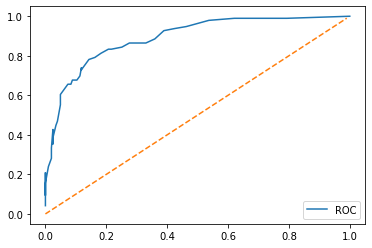

In [ ]:
roc_auc(df, predictors1)
plot_auc(df, predictors1)

In [ ]:
evaluation(df, predictors1)
ACC_app1 = acc

Accuracy of the model is: 82.60870 %. Matthews correlation coefficient between the estimates and the true response is: 0.59167. Model's precision is 0.76 and it's recall is 0.6771.


Removing these insignificant attributes (p-value > 0.005) does not improve the logit model.

* Does not improve the model AUROC (remains at 0.89). 
* Accuracy reduced from 84.28% to 82.61%
* Matthews correlation coefficient reduced from 0.63 to 0.59
* Precision reduced from 0.79 to 0.76
* Recall reduced from 0.70 to 0.68

.



* **Second Approach:** :combinations of predictors 

The attributes have several categorical nominal variables, namely, anaemia, diabetes, high_blood_pressure, sex, smoking. In the first approach, the model parameters of categorical variables are interpreted as 'subcategory assigned to 1' versus 'subcategory assigned to 0' (eg. male vs female). In this second, approach, we spit the categorical variables into their subcategories and see if the model accuracy and other evaluation criteria will improve.

Recognizing that the subcategories are correlated to each other, since if var0 = 1 then var1 = 0, and vice-versa, we do not simultaneously use both subcategories as predictors in our regression.

In [ ]:
#creating new dataframe with the dummy binary variables
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df_new=df
dummy_list = []
for i in binary_vars:
    dummy = pd.get_dummies(df_new[i], prefix=i)
    df_new.drop(i,axis=1,inplace= True) 
    df_new = df_new.join(dummy)
    
    dummy_names = dummy.columns.tolist() #last two lines inside loop is to create a list of names of dummy for deriving combination later
    dummy_list.append(dummy_names)
    
df_new.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_0,anaemia_1,diabetes_0,diabetes_1,high_blood_pressure_0,high_blood_pressure_1,sex_0,sex_1,smoking_0,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,1,0,1,0,0,1,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,1,0,1,0,1,0,0,1,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,1,0,1,0,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,1,1,0,1,0,0,1,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,0,1,0,1,1,0,1,0,1,0


In [ ]:
predictors2 = df_new.columns.tolist()
predictors2.remove('DEATH_EVENT')
#predictors

To ensure predictors are independent from each other, we do not simultaneously include the two variable that were split from the binary variable in our regression. We use iteration to come up with logit models with different combinations of predictors. 

In [ ]:
nonbinary_vars = [i for i in df.columns.tolist() if i not in binary_vars]
nonbinary_vars.remove('DEATH_EVENT')
#nonbinary_vars

In [ ]:
binary_vars_combination = [p for p in itertools.product(*dummy_list)]
#binary_vars_combination

In [ ]:
AIC_min = 300
acc_max = 0
auc_max = 0
global df_eval
df_eval = pd.DataFrame(columns=['Combination','Predictors', 'Accuracy', 'Matthews_Coef', 'Precision', 'Recall', 'AUC', 'AIC'])

for i in range(len(binary_vars_combination)):
    #global df_eval
    predictors_new =  nonbinary_vars + list(binary_vars_combination[i])
    print('Combination', i)
    
    logitfit(df_new, predictors_new)
    print(m.summary2())
    
    evaluation(df_new, predictors_new)
    roc_auc(df_new, predictors_new)
    
    df_eval=df_eval.append({'Combination': i,'Predictors': predictors_new, 'Accuracy':acc, 'Matthews_Coef': mcc, 'Precision':prc, 'Recall':rec, 'AUC':auc, 'AIC':m.aic}, ignore_index=True)

Combination 0
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.407     
Dependent Variable:    DEATH_EVENT        AIC:                246.5655  
Date:                  2020-12-12 14:08   BIC:                290.9708  
No. Observations:      299                Log-Likelihood:     -111.28   
Df Model:              11                 LL-Null:            -187.67   
Df Residuals:          287                LLR p-value:        4.0214e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0523   0.0154  3.3880 0.0007  0.0220  0.0825
creatinine_phosphokinase  0.0002   0.0002  1.2106 0.2260 -0.0001  

Logit models with max/min evalution criteria:

In [ ]:
df_eval.describe()

,Accuracy,Matthews_Coef,Precision,Recall,AUC,AIC
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,84.280936,0.630842,0.786974,0.699870,0.894464,246.709449
std,0.294275,0.007027,0.005164,0.005574,0.000576,0.172593
min,83.612040,0.614729,0.776471,0.687500,0.893473,246.432917
25%,84.280936,0.630609,0.788235,0.697917,0.894101,246.561661
50%,84.280936,0.630609,0.788235,0.697917,0.894474,246.704347
75%,84.364548,0.632744,0.788851,0.700521,0.894878,246.853408
max,84.949833,0.646490,0.800000,0.708333,0.895372,247.000090


In [ ]:
df_eval.iloc[df_eval.Accuracy.idxmax()]
#df_eval.iloc[df_eval.Precision.idxmax()]
#df_eval.iloc[df_eval.Recall.idxmax()]
#df_eval.iloc[df_eval.AUC.idxmax()]

Combination                                                      5
Predictors       [age, creatinine_phosphokinase, ejection_fract...
Accuracy                                                   84.9498
Matthews_Coef                                              0.64649
Precision                                                      0.8
Recall                                                    0.708333
AUC                                                       0.893627
AIC                                                         246.65
Name: 5, dtype: object

In [ ]:
df_eval.iloc[df_eval.Matthews_Coef.idxmax()]

Combination                                                      5
Predictors       [age, creatinine_phosphokinase, ejection_fract...
Accuracy                                                   84.9498
Matthews_Coef                                              0.64649
Precision                                                      0.8
Recall                                                    0.708333
AUC                                                       0.893627
AIC                                                         246.65
Name: 5, dtype: object

In [ ]:
df_eval.iloc[df_eval.AIC.idxmin()]

Combination                                                      8
Predictors       [age, creatinine_phosphokinase, ejection_fract...
Accuracy                                                   84.2809
Matthews_Coef                                             0.630609
Precision                                                 0.788235
Recall                                                    0.697917
AUC                                                       0.894166
AIC                                                        246.433
Name: 8, dtype: object

The predictors set/combination with the highest logit model's accuracy value also has the highest MCC value, signifying robustness. However, as shown below, the p-values of some of the attributes are greater than 0.5% significance level. Thus, there is not enough evidence to conclude that a non-zero correlation exists, or that these attributes are significantly associated with the response.

In [ ]:
logitfit(df_new, df_eval.Predictors[5])
ACC_app2 = df_eval.Accuracy[5] #get the accuracy for this combination
print(m.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.407     
Dependent Variable:    DEATH_EVENT        AIC:                246.6499  
Date:                  2020-12-12 14:08   BIC:                291.0553  
No. Observations:      299                Log-Likelihood:     -111.32   
Df Model:              11                 LL-Null:            -187.67   
Df Residuals:          287                LLR p-value:        4.1846e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0523   0.0154  3.3856 0.0007  0.0220  0.0826
creatinine_phosphokinase  0.0002   0.0002  1.2225 0.2215 -0.0001  0.0006
ejectio

Splitting the categorical varibales into subvariables, and taking the combination of predictors with the highest accuracy and Matthews correlation coefficient, improves the model compared to original model where all variables were used as predictors.

* Accuracy increased from 84.28% to 84.95%
* Matthews correlation coefficient increased from 0.63 to 0.65
* Precision increased from 0.79 to 0.80
* Recall increased from 0.6979 to 0.7083
* AUROC decreased from 0.89504 to 0.893627, but still higher than 0.5.

.




* **Third Approach:** Backward Elimination (minimize AIC)

We try to trim down the attributes by minimizing the model's Akaike information criterion (AIC) using backward elimination. The resulting evaluation criteria and p-values are also extracted to decide on the acceptable logit model.

(Backward elimination through maximizing the accuracy and AUC was also attempted but the combinations with max accuracy and AUC presented above are already the optimum. No further elimination will increase their values.)

In [ ]:
b = df_eval.Predictors[8] #combination with least AIC from Second Approach
AIC_min=df_eval.AIC.min()
df_eval2 = pd.DataFrame(columns=['Combination','Predictors', 'Accuracy', 'Matthews_Coef', 'Precision', 'Recall', 'AUC', 'AIC', 'max_p-value'], index=None)
for i in range(len(b)):
    for j in b:
        test_predictors = b[:]
        test_predictors.remove(j)
        logitfit(df_new, test_predictors)
        if m.aic < AIC_min:
            new_predictors = test_predictors[:]
            m_new = m
            AIC_min = m_new.aic
    print('Combination', i)
    print(m_new.summary2())
    evaluation(df_new, new_predictors)
    roc_auc(df_new, new_predictors)
    df_eval2=df_eval2.append({'Combination': i,'Predictors': new_predictors, 'Accuracy':acc, 'Matthews_Coef': mcc, 'Precision':prc, 'Recall':rec, 'AUC':auc, 'AIC':AIC_min, 'max_p-value': m_new.pvalues.max()}, ignore_index=True)        
    b = new_predictors

Combination 0
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.407     
Dependent Variable:    DEATH_EVENT        AIC:                244.4496  
Date:                  2020-12-12 14:08   BIC:                285.1545  
No. Observations:      299                Log-Likelihood:     -111.22   
Df Model:              10                 LL-Null:            -187.67   
Df Residuals:          288                LLR p-value:        9.4336e-28
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0524   0.0154  3.3919 0.0007  0.0221  0.0826
creatinine_phosphokinase  0.0002   0.0002  1.2218 0.2218 -0.0001  

In [ ]:
df_eval2

,Combination,Predictors,Accuracy,Matthews_Coef,Precision,Recall,AUC,AIC,max_p-value
0,0,"[age, creatinine_phosphokinase, ejection_fract...",84.280936,0.630609,0.788235,0.697917,0.893704,244.449626,0.898092
1,1,"[age, creatinine_phosphokinase, ejection_fract...",84.280936,0.630609,0.788235,0.697917,0.893242,242.466029,0.834093
2,2,"[age, creatinine_phosphokinase, ejection_fract...",84.280936,0.630609,0.788235,0.697917,0.895448,240.509979,0.739078
3,3,"[age, creatinine_phosphokinase, ejection_fract...",84.280936,0.631896,0.781609,0.708333,0.893191,238.621270,0.485921
4,4,"[age, creatinine_phosphokinase, ejection_fract...",84.615385,0.639147,0.790698,0.708333,0.894422,237.107729,0.540674
5,5,"[age, creatinine_phosphokinase, ejection_fract...",84.615385,0.637992,0.797619,0.697917,0.893447,235.491043,0.208592
6,6,"[age, creatinine_phosphokinase, ejection_fract...",83.946488,0.622054,0.785714,0.687500,0.891651,235.243140,0.265438
7,7,"[age, ejection_fraction, serum_creatinine, time]",82.608696,0.591671,0.755814,0.677083,0.890574,234.643174,0.000029
8,8,"[age, ejection_fraction, serum_creatinine, time]",82.608696,0.591671,0.755814,0.677083,0.890574,234.643174,0.000029
9,9,"[age, ejection_fraction, serum_creatinine, time]",82.608696,0.591671,0.755814,0.677083,0.890574,234.643174,0.000029


In [ ]:
df_eval2.max()

Combination                                                    11
Predictors       [age, ejection_fraction, serum_creatinine, time]
Accuracy                                                  84.6154
Matthews_Coef                                            0.639147
Precision                                                0.797619
Recall                                                   0.708333
AUC                                                      0.895448
AIC                                                        244.45
max_p-value                                              0.898092
dtype: object

The predictors set/combination no.4 has the model with highest accuracy and Matthews correlation coefficient (MCC) values. The maximum p-value of attributes is still quite high at 0.54. However, models with p_values less than 0.005 have lower acc and mcc.

The attributes in this model are quite similar to the relevant attributes ranked by Random Forest Classifier (shown under Machine Learning section below), except for sex_0. This attribute may be relevant in the logit model because of its high coefficient value.

In [ ]:
logitfit(df_new, df_eval2.Predictors[4])
ACC_app3 = df_eval2.Accuracy[4]
print(m.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.406     
Dependent Variable:    DEATH_EVENT        AIC:                237.1077  
Date:                  2020-12-12 14:08   BIC:                263.0108  
No. Observations:      299                Log-Likelihood:     -111.55   
Df Model:              6                  LL-Null:            -187.67   
Df Residuals:          292                LLR p-value:        2.5981e-30
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0520   0.0112  4.6298 0.0000  0.0300  0.0740
creatinine_phosphokinase  0.0002   0.0002  1.3227 0.1859 -0.0001  0.0006
ejectio

In [ ]:
m.pvalues.sort_values(ascending=True)

time                        3.204689e-13
ejection_fraction           8.781893e-07
age                         3.660122e-06
serum_creatinine            5.848753e-05
sex_0                       1.630648e-01
creatinine_phosphokinase    1.859232e-01
platelets                   5.406741e-01
dtype: float64

In [ ]:
params = m.params
conf = m.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf).sort_values('Odds Ratio', ascending=False))

                                5%       95%  Odds Ratio
serum_creatinine          1.439946  2.882874    2.037445
sex_0                     0.814719  3.375124    1.658246
age                       1.030427  1.076786    1.053351
creatinine_phosphokinase  0.999892  1.000555    1.000224
platelets                 0.999996  1.000002    0.999999
time                      0.974570  0.985272    0.979907
ejection_fraction         0.900296  0.955841    0.927653


The above indicates that the attributes namely **age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine, time and females can satisfactorily predict the death occurence due to heart failure**, given the evaluation criteria. 

.

From the above, we now know that **high levels of serum creatinine contribute to occurence of death, as it has the highest greater than 1 odds ratio**. Moreover, **females are more susceptible** to death due to heart failure, as evident also by the high odds ratio (greater than 1). **Age and creatinine phosphokinase are also associated with death occurence but to lower extents**. Meanwhile, ejection fraction, time (follow-up period) and platelets density are associated to the non-occurence of death because of as indicated by their less than 1 odds ratio. 
.

**Time, ejection fraction, age and serum creatinine have p-values less than 0.5% significance level. These indicate that there is significant evidence to conclude these attributes are correlated to heart failure.** 

.

Interestingly, **time is significant and is negatively associated with death occurence**. Perhaps, it could be interpreted that the longer the gap between follow-up check-ups, the less severe is the heart issue, thus less likely for patient to die.

.



* **Logistic Regression using Machine Learning** 

In [ ]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df.drop('DEATH_EVENT',axis=1), 
                                                    df['DEATH_EVENT'], test_size=0.30, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train_log,y_train_log)

LogisticRegression()

In [ ]:
df_coef = pd.DataFrame(df.drop('DEATH_EVENT',axis=1).columns)
df_coef.loc[:,'coefficient'] = logmodel.coef_[0]
df_coef.loc[:,'Odds Ratio'] = np.exp(logmodel.coef_[0])
df_coef.sort_values(by=['Odds Ratio'], inplace=True, ascending=False)
df_coef

,0,coefficient,Odds Ratio
0,age,9.358023e-03,1.009402
8,serum_sodium,8.571668e-03,1.008609
7,serum_creatinine,5.231787e-04,1.000523
2,creatinine_phosphokinase,2.147997e-04,1.000215
1,anaemia,1.172142e-04,1.000117
10,smoking,6.249943e-05,1.000063
5,high_blood_pressure,4.799447e-05,1.000048
9,sex,3.333940e-05,1.000033
3,diabetes,3.177202e-05,1.000032
6,platelets,-9.060658e-07,0.999999


In [ ]:
#intercept
print(logmodel.intercept_)

[6.94810463e-05]


In [ ]:
predictions_log = logmodel.predict(X_test_log)
df_log = pd.DataFrame({'Actual': y_test_log, 'Predicted': predictions_log})  
df_log.loc[:, 'p'] = [i[1] for i in logmodel.predict_proba(X_test_log)]
df_log.head()

,Actual,Predicted,p
176,0,0,0.241054
280,0,0,0.045500
12,1,1,0.797696
16,1,1,0.804272
257,0,0,0.034163


In [ ]:
df_log.loc[:, 'y_p'] = (df_log.p > 0.5) * 1
df_log.y_p.value_counts()

0    68
1    22
Name: y_p, dtype: int64

In [ ]:
pd.crosstab(df.DEATH_EVENT, df_log.y_p)

y_p,0,1
DEATH_EVENT,,
0,58,4
1,10,18


In [ ]:
#accuracy
ACC_ml_log = 100*logmodel.score(X_test_log, y_test_log)
ACC_ml_log

84.44444444444444

In [ ]:
print(classification_report(y_test_log,predictions_log)) #other evaluation criteria

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



**Taking all attributes as predictors**, there is an **increase in model accuracy** when using machine learning test-train algorithm. The increase in accuracy is from 84.28% to 84.44%.

.

### Machine Learning (ML) Models (other classifiers) 

Here, we consider an important concept in ML models: the concept of **train and test**. The idea is to split a data into two parts, usually 80% and 20% OR 70% and 30%, where the first portion of the data is used to train the model, and the second part is used to test it. This is called *Supervised Learning*.

Here, we study two different approaches:
* Random Forest Classifier
* KNN Classifier

Let's fit the data based on a model obtained using the **Random Forest classifier**.

X represents the features/predictors/input for the model.
y is the training target for ML model. In this example, it is the binary column 'DEATH_EVENT'.

In [ ]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [ ]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex','smoking','time']]
y = df['DEATH_EVENT']

print(X.shape)
print(y.shape)

(299, 12)
(299,)


**Train-test split**: 80% of the data will be used for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


In [ ]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
178,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
86,55.0,0,47,0,35,1,173000.00,1.1,137,1,0,79
210,70.0,0,212,1,17,1,389000.00,1.0,136,1,1,188
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126
170,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,145


In [ ]:
y_train.head()

178    0
86     0
210    0
163    1
170    0
Name: DEATH_EVENT, dtype: int64

**Using the Random Forest Classifier**

**TRAINING**

In [ ]:
%%time
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf_clf.fit(X_train, y_train) #train the model on the training set

Wall time: 295 ms


RandomForestClassifier(n_estimators=200, n_jobs=-1)

**TESTING**

In [ ]:
y_pred = rf_clf.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(60,)


array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [ ]:
#compare y_pred to our actual y_test
(y_pred == y_test).sum()

54

**This is a really good number: Out of the 60 tested, the model got 55 of them right!**

Let's calculate the accuracy of our prediction:

In [ ]:
ACC_RFC = 100*accuracy_score(y_test, y_pred)
print(ACC_RFC)

90.0


In [ ]:
print('This is', accuracy_score(y_test, y_pred)*100,'% accuracy in the ability of the model to predict Heart Failure.')

This is 90.0 % accuracy in the ability of the model to predict Heart Failure.


In [ ]:
y_test.value_counts()

0    39
1    21
Name: DEATH_EVENT, dtype: int64

In [ ]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.65

One way to visualize this is to use a **Confusion Matrix**.

<Figure size 2000x1500 with 0 Axes>

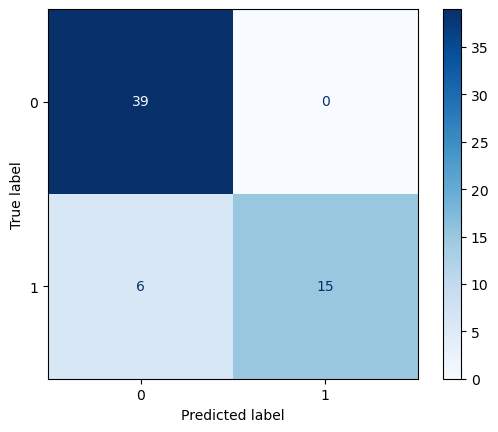

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"): #temporarily set the plot style
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(rf_clf, X_test, y_test, values_format="", cmap="Blues")

Now, let's look at the **most important features** that determine Death.

In [ ]:
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
time,0.343004
serum_creatinine,0.127541
ejection_fraction,0.125640
age,0.106342
creatinine_phosphokinase,0.087558
platelets,0.081745
serum_sodium,0.063689
sex,0.014268
smoking,0.013576
diabetes,0.013137


Notice how the significance is directly related to the correlations calculated in the early part of this analysis.

Here is a visual for the feature importance, as used by the Random Forest Classifier:

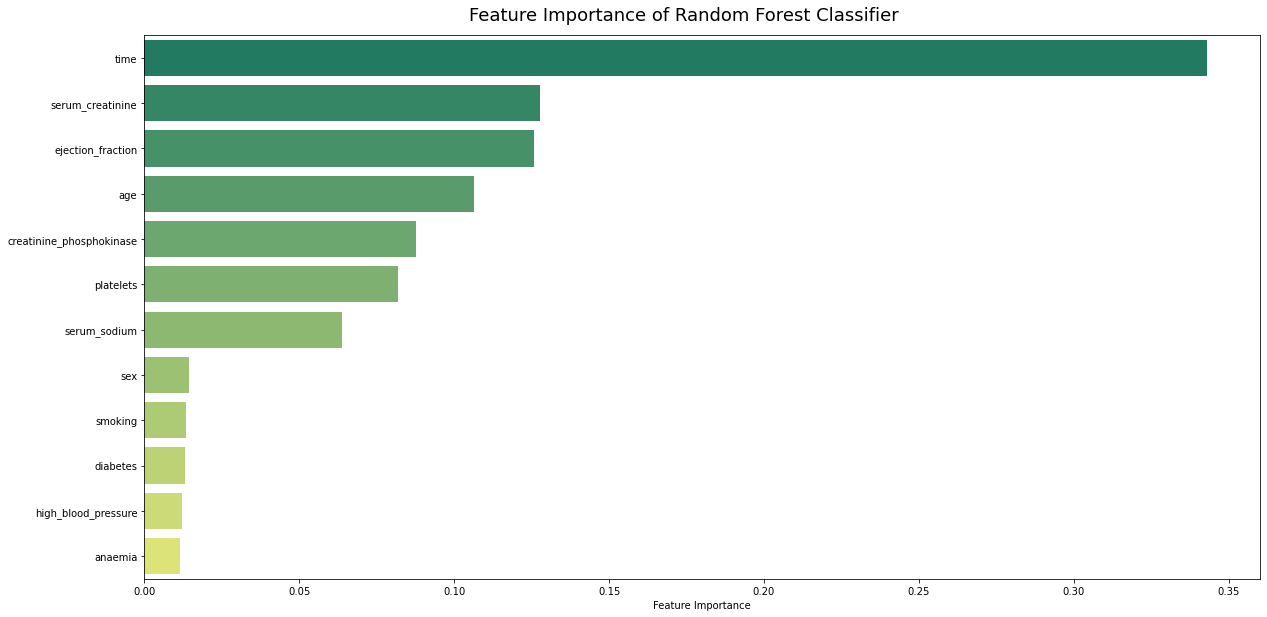

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);

Now, let's build a model using the **k-Nearest Neighbors Classifier**.

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df['DEATH_EVENT'])
df['DEATH_EVENT_t']=le.transform(df['DEATH_EVENT'])

In [ ]:
pd.crosstab(df['DEATH_EVENT'],df['DEATH_EVENT_t'])

DEATH_EVENT_t,0,1
DEATH_EVENT,,
0,203,0
1,0,96


In [ ]:
X=df[['anaemia','age','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
              'serum_sodium','sex','smoking','time']]
Y=df['DEATH_EVENT_t']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(209, 12)
(209,)
(90, 12)
(90,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
result = knn.predict(x_test)
y_pred=list(result)
y_true=list(y_test)
print(y_pred)
print(y_true)

[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [ ]:
ACC_KNN = 100*accuracy_score(y_true, y_pred)
print(ACC_KNN)

54.44444444444444


In [ ]:
correct = np.count_nonzero((result == y_test) == True)
correct

49

In [ ]:
split=np.arange(1,11)
neighbors =[1, 3, 5, 7, 10, 20, 30, 40, 50]
s_all=[]
s_mean_all=[]
c_all=[]
c_mean_all=[]

for k in neighbors:
    score=0
    score_mean=0
    c=0
    c_mean=0
    for i in split:
        if i<=10:
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(x_train, y_train)
            result = knn.predict(x_test)
            y_pred=list(result)
            y_true=list(y_test)
            score += accuracy_score(y_true, y_pred)
            score_mean= score/10
            correct = np.count_nonzero((result == y_test) == True)
            c+=correct
            c_mean=c/10
        if i == 10:
            s_all.append(score)
            s_mean_all.append(score_mean)
            c_all.append(c)
            c_mean_all.append(c_mean)
        i+=1
                
print(s_mean_all)
print(c_mean_all)

[0.5283333333333333, 0.5883333333333333, 0.6149999999999999, 0.61, 0.6416666666666666, 0.675, 0.6666666666666666, 0.6700000000000002, 0.6633333333333333]
[31.7, 35.3, 36.9, 36.6, 38.5, 40.5, 40.0, 40.2, 39.8]


In [ ]:
data={'K':neighbors,'correct_predictors_average':c_mean_all,'accuracy_score_average':s_mean_all}
df=pd.DataFrame(data)
df

,K,correct_predictors_average,accuracy_score_average
0,1,31.7,0.528333
1,3,35.3,0.588333
2,5,36.9,0.615000
3,7,36.6,0.610000
4,10,38.5,0.641667
5,20,40.5,0.675000
6,30,40.0,0.666667
7,40,40.2,0.670000
8,50,39.8,0.663333


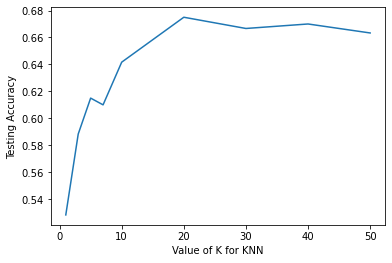

In [ ]:
plt.plot(neighbors, s_mean_all)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

When the number of neighbors k is 50, the model has the highest prediction accuracy 66%.

**The Random Forest Classifier Method gave a comparable accuracy to the *quick* Logistic Regression Model used earlier in the analysis, while the KKN method gave about 20% less accuracy.**

.



## Summary##

In [ ]:
approach =['Initial model- log reg', 'Approach 1 -log reg', "Approach 2 -log reg", "Approach 3 -log reg", "ML Log Regression", "Random Forest Classifier", "k-Nearest Neighbors Classifier."]
predictors_ = ['all attributes', 'attributes with p-value < 0.005', "with combination of categorical attributes", "combination from backward elimination", "all attributes", "all attributes", "all attributes"]
accuracies = np.around([ACC_all_var, ACC_app1, ACC_app2, ACC_app3, ACC_ml_log, ACC_RFC, ACC_KNN],2)
summary = pd.DataFrame({'Approach': approach, 'Predictors Used': predictors_,'Model Accuracy': accuracies})
summary

,Approach,Predictors Used,Model Accuracy
0,Initial model- log reg,all attributes,84.28
1,Approach 1 -log reg,attributes with p-value < 0.005,82.61
2,Approach 2 -log reg,with combination of categorical attributes,84.95
3,Approach 3 -log reg,combination from backward elimination,84.62
4,ML Log Regression,all attributes,84.44
5,Random Forest Classifier,all attributes,90.00
6,k-Nearest Neighbors Classifier.,all attributes,54.44


The logistic regression models we derived can offer good prediction of the occurence of death due to heart failure, with accuracy in range of 82.61% - 84.95%, slightly lower than the Random Forest Classifier approach.

The attributes ranked high in relative importance by Random Forest Classifier, namely time, serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets and serum_sodium, are also the predictors in the logistic regression approaches (especially Approach 3) that have either low p-values (meaning the attributes are significant) and odds ratio greater than 1 (indicating association with death occurence).

Therefore, from our evalution and analysis, we can conclude that we can derive models using logistic regression from our dataset that can predict the occurence of death due to heart failure with good statistical accuracy.

.

.



### Appendix - Demonstrating the Inappropriateness of a Linear Regression Model for the Heart Failure Data

In [ ]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df = pd.DataFrame(data)

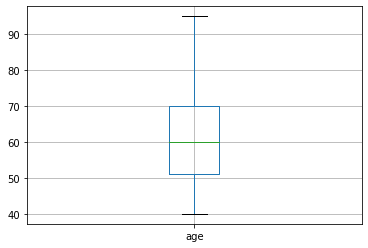

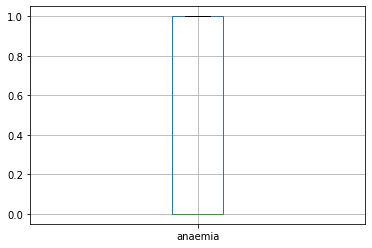

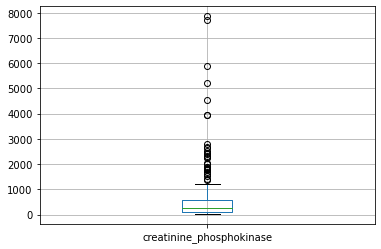

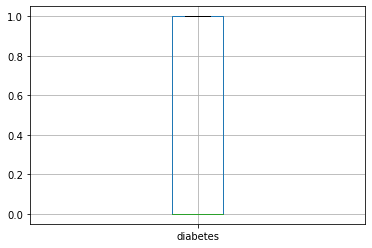

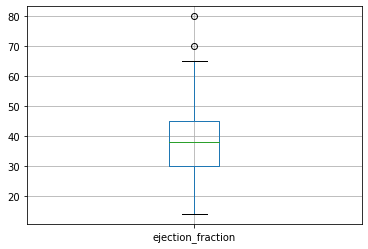

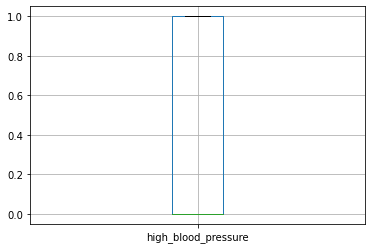

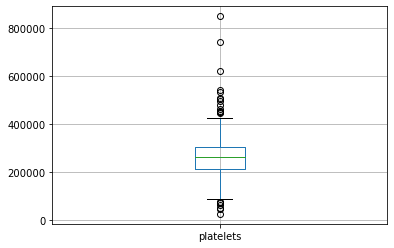

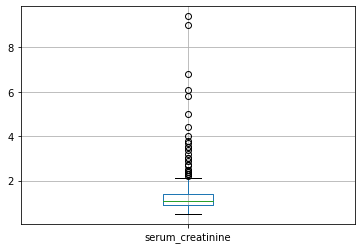

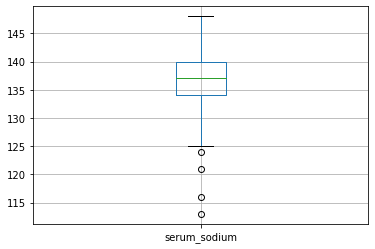

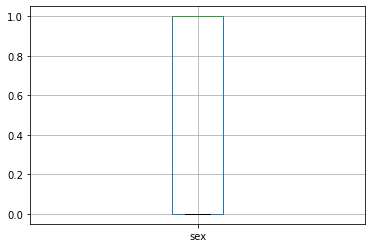

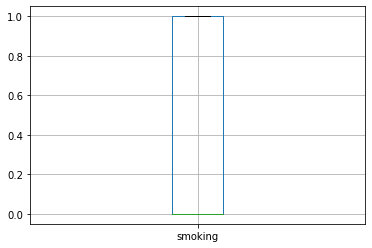

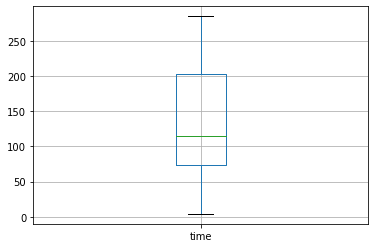

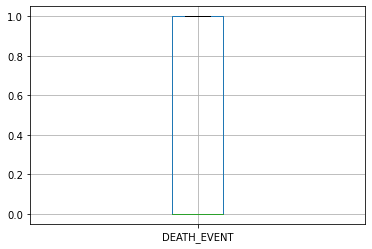

In [ ]:
#Boxplots to see outliers, then assess and remove
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
# Removing Outliers assuming reason was found
df_clean = df[df['creatinine_phosphokinase'] < 1300]
df_clean = df_clean[df_clean['ejection_fraction'] < 70]
df_clean = df_clean[df_clean['platelets'] > 90000]
df_clean = df_clean[df_clean['platelets'] < 410000]
df_clean = df_clean[df_clean['serum_creatinine'] < 1.7]
df_clean = df_clean[df_clean['serum_sodium'] > 127]
df_clean = df_clean[df_clean['serum_sodium'] <= 145]

In [ ]:
df4=df #new dataframe
#Creating the dummy variables for Binary variables
one_hot = pd.get_dummies(df4, columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'])
#Adding the dummy variables to the dataset
df4 = pd.concat([df4,one_hot], axis = 1)
df4 = df4.dropna() #making sure no null values exist

In [ ]:
df4.columns #showing new dummy column names

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'anaemia_0',
       'anaemia_1', 'diabetes_0', 'diabetes_1', 'high_blood_pressure_0',
       'high_blood_pressure_1', 'sex_0', 'sex_1', 'smoking_0', 'smoking_1',
       'DEATH_EVENT_0', 'DEATH_EVENT_1'],
      dtype='object')

In [ ]:
#Building the Ordinary Linear Regression Model
result1 = ols('DEATH_EVENT ~ age + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + serum_sodium + time + anaemia_0 + diabetes_0 + high_blood_pressure_0 + sex_0 + smoking_0', data = df4).fit()

In [ ]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.35e-27
Time:                        14:08:36   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5964      0.696      2.293      0.023       0.226       2.967
age[0]                          0.0029      0.001      3.088      0.002       0.001       0.005
age[1]                          0.0029      0.001      3.088      0.002       0.001       0.005
creatinine_phosphokinase[0]  1.713e-05   1.12e-05      1.525      0.128   -4.98e-06    3.92e-05
creatinine_phosphokinase[1]  1.713e-05   1.12e-05      1.525      0.128   -4.98e-06    3.92e-05
ejection_fraction[0]           -0.0049      0.001     -5.333      0.000      -0.007      -0.003
ejection_fraction[1]           -0.0049      0.001     -5.333      0.000      -0.007      -0.003
platelets[0]                -4.187e-08    1.1e-07     -0.379      0.705   -2.59e-07    1.75e-07
platelets[1]                -4.183e-08    1.1e-07     -0.379      0.705   -2.59e-07    1.75e-07
serum_creatinine[0]             0.0426      0.011      4.017      0.000       0.022       0.064
serum_creatinine[1]             0.0426      0.011      4.017      0.000       0.022       0.064
serum_sodium[0]                -0.0038      0.003     -1.513      0.131      -0.009       0.001
serum_sodium[1]                -0.0038      0.003     -1.513      0.131      -0.009       0.001
time[0]                        -0.0014      0.000     -9.415      0.000      -0.002      -0.001
time[1]                        -0.0014      0.000     -9.415      0.000      -0.002      -0.001
anaemia_0                       0.0028      0.044      0.062      0.950      -0.085       0.090
diabetes_0                     -0.0193      0.044     -0.437      0.662      -0.106       0.068
high_blood_pressure_0           0.0143      0.046      0.313      0.754      -0.076       0.104
sex_0                           0.0637      0.051      1.247      0.214      -0.037       0.164
smoking_0                       0.0057      0.051      0.112      0.911      -0.095       0.106
==============================================================================
Omnibus:                       10.068   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.014
Skew:                           0.306   Prob(JB):                       0.0182
Kurtosis:                       2.483   Cond. No.                     2.35e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.55e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Based on the OLS model, it appears that there are certain factors with a p-value of more than 0.05, thus we could consider them insignificant based on a 95% confidence and remove them to see the effect on the OLS.**

In [ ]:
#Second OLS
result2 = ols('DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + time + anaemia_0 + diabetes_0 + high_blood_pressure_0 + sex_0 + smoking_0', data = df4).fit()

In [ ]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     22.11
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.96e-28
Time:                        14:08:37   Log-Likelihood:                -118.20
No. Observations:                 299   AIC:                             256.4
Df Residuals:                     289   BIC:                             293.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5702      0.151      3.768      0.000       0.272       0.868
age[0]                    0.0028      0.001      3.038      0.003       0.001       0.005
age[1]                    0.0028      0.001      3.038      0.003       0.001       0.005
ejection_fraction[0]     -0.0052      0.001     -5.730      0.000      -0.007      -0.003
ejection_fraction[1]     -0.0052      0.001     -5.730      0.000      -0.007      -0.003
serum_creatinine[0]       0.0455      0.010      4.350      0.000       0.025       0.066
serum_creatinine[1]       0.0455      0.010      4.350      0.000       0.025       0.066
time[0]                  -0.0014      0.000     -9.630      0.000      -0.002      -0.001
time[1]                  -0.0014      0.000     -9.630      0.000      -0.002      -0.001
anaemia_0                 0.0184      0.044      0.423      0.673      -0.067       0.104
diabetes_0               -0.0238      0.044     -0.543      0.587      -0.110       0.062
high_blood_pressure_0     0.0226      0.046      0.496      0.620      -0.067       0.112
sex_0                     0.0549      0.051      1.084      0.279      -0.045       0.154
smoking_0                 0.0128      0.051      0.251      0.802      -0.088       0.113
==============================================================================
Omnibus:                        9.642   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                7.930
Skew:                           0.312   Prob(JB):                       0.0190
Kurtosis:                       2.503   Cond. No.                     1.81e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**The R-squared of the model appears  to be quite low, which might suggest that this model does not fit our data well. Therefore the focus would now be on developing a better model to explain the variation in our dataset, namely an ML Linear Regression Model**

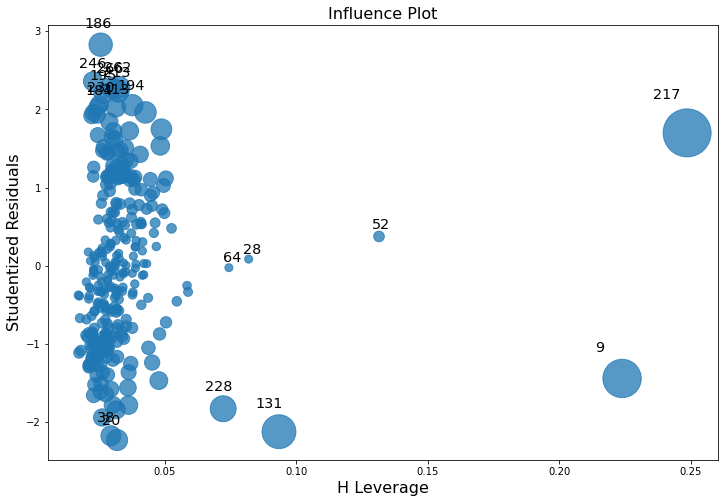

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result2, ax=ax, criterion = 'cooks')

In [ ]:
df5 = df4.drop([184,181,186,63,113,262,110,213,194,20]) #dropping data points that are influential based on cooks method

In [ ]:
result3 = ols('DEATH_EVENT ~ age + ejection_fraction + serum_creatinine + time + anaemia_0 + diabetes_0 + high_blood_pressure_0 + sex_0 + smoking_0', data = df5).fit()

In [ ]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     26.82
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           3.52e-33
Time:                        14:08:37   Log-Likelihood:                -94.776
No. Observations:                 289   AIC:                             209.6
Df Residuals:                     279   BIC:                             246.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5482      0.145      3.775      0.000       0.262       0.834
age[0]                    0.0030      0.001      3.382      0.001       0.001       0.005
age[1]                    0.0030      0.001      3.382      0.001       0.001       0.005
ejection_fraction[0]     -0.0052      0.001     -6.012      0.000      -0.007      -0.004
ejection_fraction[1]     -0.0052      0.001     -6.012      0.000      -0.007      -0.004
serum_creatinine[0]       0.0468      0.010      4.764      0.000       0.027       0.066
serum_creatinine[1]       0.0468      0.010      4.764      0.000       0.027       0.066
time[0]                  -0.0015      0.000    -10.566      0.000      -0.002      -0.001
time[1]                  -0.0015      0.000    -10.566      0.000      -0.002      -0.001
anaemia_0                 0.0286      0.042      0.688      0.492      -0.053       0.111
diabetes_0               -0.0278      0.042     -0.665      0.506      -0.110       0.054
high_blood_pressure_0     0.0065      0.043      0.149      0.882      -0.079       0.092
sex_0                     0.0598      0.048      1.244      0.215      -0.035       0.154
smoking_0                 0.0136      0.048      0.281      0.779      -0.082       0.109
==============================================================================
Omnibus:                        8.031   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.757
Skew:                           0.220   Prob(JB):                       0.0562
Kurtosis:                       2.467   Cond. No.                     7.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df6 = df5

In [ ]:
# Reshaping the array to perform an ML model
df6['DEATH_EVENT'] = df6['DEATH_EVENT'].values.reshape(-1,1)
df6['anaemia'] = df6['anaemia'].values.reshape(-1,1)
df6['diabetes'] = df6['diabetes'].values.reshape(-1,1)
df6['high_blood_pressure'] = df6['high_blood_pressure'].values.reshape(-1,1)
df6['sex'] = df6['sex'].values.reshape(-1,1)
df6['smoking'] = df6['smoking'].values.reshape(-1,1)

In [ ]:
# dependent and independent variables of the ML model
y = df6['DEATH_EVENT']
x = df6[['age', 'ejection_fraction', 'serum_creatinine', 'time', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=None) 

In [ ]:
train_model = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)

In [ ]:
predict = train_model.predict(X_test)

In [ ]:
test_rmse = (np.sqrt(mean_squared_error(Y_test, predict)))

In [ ]:
test_r2 = r2_score (Y_test, predict)

In [ ]:
print('RMSE is: ', test_rmse, '//', 'R2_Score is: ', test_r2)

RMSE is:  0.36260664057925807 // R2_Score is:  0.37250997151893184


This R^2 value is not great in this case either. **Neither is the Linear Regression Model appropriate nor needed here**. As can be seen in the earlier analysis in this file, both Logistic Regression models and the earlier Machine Learning models, are much better in predicting Death Occurence by Heart Failure. As discussed earlier, they are the more appropriate models for the current data under study.